## 回歸樹（Regression Trees）
回歸樹（Regression Trees）是決策樹（Decision Trees）的一種形式，專門用於解決回歸問題，即當目標變量是連續值而不是離散類別時。回歸樹通過從數據中學習決策規則來預測一個連續的數值。這與分類樹類似，但分類樹的目的是預測數據的類別標籤。

### 基本原理
    - 回歸樹的工作原理與決策樹相似，但在決定每個節點如何分割數據時，它考慮的是減少預測誤差而不是增加信息增益或純度。具體來說，回歸樹通過以下步驟建模：
    1. 選擇最佳分割：選擇一個特徵和一個閾值將數據分成兩個子集，使得這個分割最大程度減少目標變量的總平方誤差（SSE）。
    2. 遞歸分割：對每個子集重複這個分割過程，直到達到一個停止條件（如最大深度、最小樣本數等）。
    3. 預測輸出：在每個葉節點（終端節點），輸出的預測值是該節點所有樣本目標值的平均值。
    
### 模型評估與過擬合
與所有機器學習模型一樣，回歸樹也容易發生過擬合，尤其是當樹太深或樹中的節點包含太少的樣本時。為了避免過擬合，通常會使用一些策略，如：
1. 剪枝：減少樹的大小，通過去除對最終模型預測能力貢獻不大的節點。
2. 設定最大深度：限制樹的深度。
3. 最小樣本分割：設定節點分割前必須擁有的最小樣本數。

In [ ]:
# 導入所需的庫
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 加載數據集
boston = load_boston()
X = boston.data
y = boston.target

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建回歸樹模型
regressor = DecisionTreeRegressor(random_state=42)

# 訓練模型
regressor.fit(X_train, y_train)

# 進行預測
y_pred = regressor.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("均方根誤差（RMSE）:", rmse)


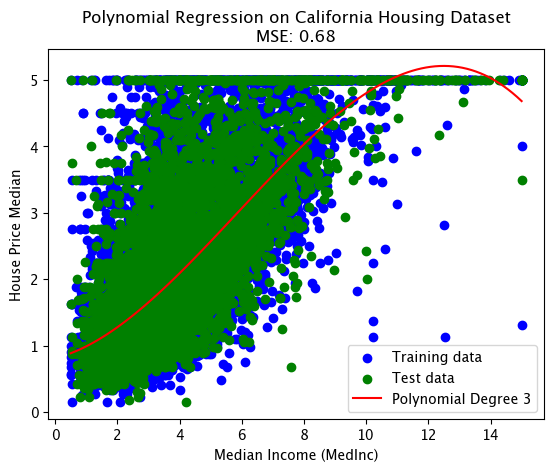

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 加載數據集
california = fetch_california_housing()
X = california.data[:, 0]  # 只使用 MedInc 變數（該地區的中位收入）
y = california.target       # 房價中位數

# 數據需要被重新塑形成二維陣列
X = X.reshape(-1, 1)

# 切分數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用多項式特徵的三次多項式回歸
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# 進行預測
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_fit)

# 計算均方誤差
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)

# 繪圖展示
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_fit, y_pred, color='red', label=f'Polynomial Degree {degree}')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price Median')
plt.title(f'Polynomial Regression on California Housing Dataset\nMSE: {mse:.2f}')
plt.legend()
plt.show()


## Adaboost 模型介紹

Adaboost 是一種決策樹模型，由多棵決策樹的組合而成。它是一種基於提升算法 (Boosting) 的機器學習模型，其核心思想是透過多棵決策樹的組合來提升預測準確率。

### Adaboost 基本原理
AdaBoost 的工作機制基於以下步驟：

1. 初始化權重：給訓練數據中的每個樣本一個初始權重，通常是相等的，例如，對於 N 個樣本，每個樣本的初始權重為 1/N。
2. 迭代訓練弱分類器：
    1. 在每一次迭代中，用當前的權重訓練一個弱分類器（如決策樹的淺層版本）。
    2. 評估弱分類器在訓練數據上的性能，計算錯誤率。
    3. 根據錯誤率計算該弱分類器的表現權重（alpha），錯誤率越低，權重越高。
    4. 更新訓練樣本的權重：增加被當前弱分類器錯分的樣本的權重，減少正確分類的樣本的權重。
    5. 正規化權重，使其和為1。
3. 組合弱分類器：
- 將所有的弱分類器組合成一個強分類器，每個弱分類器根據其表現權重來參與最終決策。

### Adaboost 的工作原理

Adaboost 的工作原理是透過多棵決策樹的組合來提升預測準確率。在訓練過程中，每棵決策樹都會根據前一棵決策樹的預測結果來進行訓練，以逐步降低整體的誤差。

### Adaboost 的優勢
* 自適應：AdaBoost 能夠針對那些在之前的迭代中被錯誤分類的樣本增加學習的關注，使得模型對難以分類的樣本有更好的適應性。
* 少量的參數：相比其他機器學習算法，AdaBoost 只有很少的參數需要調整，主要是弱學習器的數量和選擇的基本分類器類型。
* 高效性：AdaBoost 算法相對簡單，且通常不需要做特徵選擇。

### Adaboost 的缺陷

* 容易過擬合：Adaboost 容易過擬合，需要透過正則化來避免。
* 解釋性差：Adaboost 的解釋性較差，難以理解模型的決策過程。

### Adaboost 範例

以下是一個使用 Adaboost 進行分類的範例：

**範例說明**

在上述範例中，我們使用了 scikit-learn 中的 iris 資料集來進行分類。iris 資料集包含 150 個樣本，每個樣本有 4 個特徵，分別是花萼長度、花萼寬度、花瓣長度和花瓣寬度。我們將資料集拆分為訓練集和測試集，並使用 Adaboost 模型進行訓練。訓練完成後，我們使用模型對測試集進行預測，並評估模型的準確率。

### 總結

Adaboost 是一種準確率高、訓練速度快的決策樹模型，適用於多種資料類型。
在 Kaggle 競賽中，Adaboost 和 RFT 都是常用的模型。具體選擇哪種模型，需要根據資料的特性和比賽的目標來決定。


- 如果數據集中存在大量的噪聲數據，可以選擇 RFT 模型。
- 如果對模型的訓練速度有要求，可以選擇 RFT 模型。
- 如果需要更高的預測準確率，可以選擇 Adaboost 模型。

<!-- 
此外，還可以嘗試使用其他機器學習模型，例如 XGBoost、LightGBM 等。

| 模型 | 學習方式 | 學習目的 | 所用基礎分類器 |
|---|---|---|---|
| RFT | 並行學習 | 強化分類器提高泛化能力 | 強決策樹 |
| Adaboost | 串行學習 | 弱分類器提高分類能力 | 弱決策樹 |
| GBDT | 串行學習 | 殘差學習 | 決策樹殘差 |
| XGB | 串行學習 | 殘差學習 | 決策樹殘差 | -->


In [51]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import random

np.random.seed()

# 載入 iris 資料集
iris = datasets.load_iris()

# 將資料集轉換為 DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25)

# 建立 Adaboost 模型
adaboost = AdaBoostClassifier()
# 訓練模型
adaboost.fit(X_train, y_train)

# 建立 RandomForestTree 模型
rft = RandomForestClassifier()

# 訓練模型
rft.fit(X_train, y_train)

# 預測結果
ada_boost_predictions = adaboost.predict(X_test)
rft_predictions = rft.predict(X_test)

# 評估模型
print('adaboost 準確率:', accuracy_score(y_test, ada_boost_predictions))
print('RFT 準確率:', accuracy_score(y_test, rft_predictions))


adaboost 準確率: 0.9473684210526315
RFT 準確率: 0.9473684210526315


## GBT 模型介紹

GBT (Gradient Boosting Trees) 是一種決策樹模型，由梯度提升算法 (Gradient Boosting) 和決策樹 (Decision Tree) 組成。

### GBT 的工作原理

GBT 的工作原理是透過多棵決策樹的組合來提升預測準確率。在訓練過程中，每棵決策樹都會根據前一棵決策樹的殘差 (residual) 來進行訓練，以逐步降低整體的誤差。

### GBT 的優勢

* 準確率高：GBT 可以透過多棵決策樹的組合來提升預測準確率。
* 泛化能力強：GBT 可以透過正則化 (regularization) 來避免過擬合 (overfitting)。
* 適用於多種資料類型：GBT 可以適用於數值型、類別型和混合型資料。

### GBT 的缺陷

* 訓練速度慢：GBT 的訓練速度會隨著樹的數量增加而變慢。
* 容易過擬合：GBT 容易過擬合，需要透過正則化來避免。
* 解釋性差：GBT 的解釋性較差，難以理解模型的決策過程。

### GBT 與 RFT 的比較

RFT (Random Forest Trees) 也是一種決策樹模型，由多棵決策樹的組合而成。

**GBT 與 RFT 的主要區別在於：**

* 訓練方式：GBT 使用梯度提升算法來訓練，而 RFT 使用隨機森林算法來訓練。
* 準確率：GBT 的準確率通常略高於 RFT。
* 訓練速度：RFT 的訓練速度通常快於 GBT。
* 解釋性：RFT 的解釋性通常優於 GBT。

**以下表格總結了 GBT 與 RFT 的比較：**

| 特性 | GBT | RFT |
|---|---|---|
| 訓練方式 | 梯度提升算法 | 隨機森林算法 |
| 準確率 | 較高 | 略低 |
| 訓練速度 | 較慢 | 較快 |
| 解釋性 | 較差 | 較優 |

### 總結

GBT 是一種準確率高、泛化能力強的決策樹模型，適用於多種資料類型。但是，GBT 的訓練速度較慢，容易過擬合，解釋性差。RFT 是一種訓練速度快、解釋性好的決策樹模型，但是準確率略低於 GBT。

在 Kaggle 競賽中，GBT 和 RFT 都是常用的模型。具體選擇哪種模型，需要根據資料的特性和比賽的目標來決定。

In [52]:
# 匯入必要的庫
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 載入 iris 資料集
iris = load_iris()

# 將資料集分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立 GBT 模型
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3)

# 訓練模型
gbdt.fit(X_train, y_train)

# 評估模型
score = gbdt.score(X_test, y_test)
print("GBT 模型的準確率為：", score)


GBT 模型的準確率為： 0.9736842105263158


# XGBoost 介紹

XGBoost (eXtreme Gradient Boosting) 是一種基於梯度提升算法 (Gradient Boosting) 的機器學習模型，其核心思想是透過多棵決策樹的組合來提升預測準確率。

## XGBoost 的優點

XGBoost 具有以下優點：

* **預測準確率高**

XGBoost 是一種非常有效的機器學習模型，在多個機器學習比賽中都取得了非常好的成績。

* **訓練速度快**

XGBoost 使用了多種優化技術，可以有效地提高訓練速度。

* **適用於多種數據類型**

XGBoost 可以適用於多種數據類型，包括數值型、類別型等。

## XGBoost 的缺點

XGBoost 具有以下缺點：

* **對噪聲數據敏感**

XGBoost 是一種基於梯度提升算法的模型，因此對噪聲數據非常敏感。如果訓練數據中存在大量的噪聲數據，可能會導致 XGBoost 模型的準確率大幅下降。

* **容易出現過擬合**

XGBoost 是一種迭代算法，在訓練過程中會不斷加入新的決策樹。如果迭代次數過多，可能會導致 XGBoost 模型出現過擬合現象。

## XGBoost 的參數

XGBoost 具有多個參數，可以對模型的性能進行調優。以下是一些常用的參數：

* **n_estimators**：決策樹的數量。
* **learning_rate**：學習率。
* **max_depth**：決策樹的最大深度。
* **min_child_weight**：葉子節點的最小權重。
* **gamma**：正則化項的係數。

## 注意

* **XGBoost 是一種非常強大的機器學習模型，但需要進行仔細的調優才能獲得最佳性能。**
* **XGBoost 對噪聲數據非常敏感，因此在使用前需要對數據進行清洗。**
* **XGBoost 容易出現過擬合，因此需要使用正則化技術來防止過擬合。**

## XGB 與 GBT 比較

XGB 與 GBT 非常相似，都是基於梯度提升算法的機器學習模型。XGB 在 GBDT 的基礎上進行了一些改進，例如：

* XGB 使用了正則化項來防止過擬合。
* XGB 使用了樹節點分裂的最佳候選者搜索算法來提升模型的性能。

因此，在一般情況下，XGB 的性能會優於 GBDT。

## 訓練資料注意事項

資料量： XGB 可以應用於大資料集。XGB 使用了多種優化技術，可以有效地提高訓練速度。

資料類型： XGB 可以應用於多種資料類型，包括數值型、類別型等。

資料分布： XGB 可以應用於非線性分布的資料。XGB 使用了樹模型，可以捕捉資料的非線性關係。

噪聲： XGB 對噪聲數據敏感。如果資料集中存在大量的噪聲數據，可能會導致 XGB 模型的準確率大幅下降。

缺失值： XGB 可以處理缺失值。XGB 使用了樹模型，可以對缺失值進行插補。


In [53]:
# 匯入必要的庫
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 載入 iris 資料集
iris = load_iris()

# 將資料集分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立 XGB 模型
xgb = XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=3)

# 訓練模型
xgb.fit(X_train, y_train)

# 評估模型
score = xgb.score(X_test, y_test)
print("XGB 模型的準確率為：", score)


XGB 模型的準確率為： 0.9736842105263158


# Tunning超參數調整步驟

若持續使用同一份驗證集 (validation) 來調參，可能讓模型的參數過於擬合該驗證集，正確的步驟是使用 Cross-validation 確保模型泛化性

## 步驟一：切分資料集

1. 將資料集切分為訓練集 (training set) 和測試集 (test set)。
2. 測試集保留不使用，用於最後評估模型的泛化性。

## 步驟二：使用交叉驗證切分訓練集

1. 將訓練集再使用交叉驗證 (cross-validation) 切分為 K 份訓練/驗證集。
2. 每份訓練/驗證集包含 K-1 份訓練集和 1 份驗證集。

## 步驟三：超參數搜索

1. 使用網格搜索 (grid search) 或隨機搜索 (random search) 等超參數搜索方法。
2. 在訓練/驗證集上訓練模型並評估性能。

## 步驟四：選出最佳超參數

1. 根據驗證集的性能，選出最佳的超參數組合。

## 步驟五：訓練最終模型

1. 使用最佳的超參數組合，對全部訓練集進行訓練。

## 步驟六：評估模型性能

1. 使用測試集評估模型的性能。

## 注意事項

* 在切分資料集時，需要確保訓練集和測試集具有相同的分布。
* 在使用交叉驗證時，需要確保每個子集都包含資料集的代表性樣本。
* 在超參數搜索時，需要考慮模型的複雜度和泛化性。


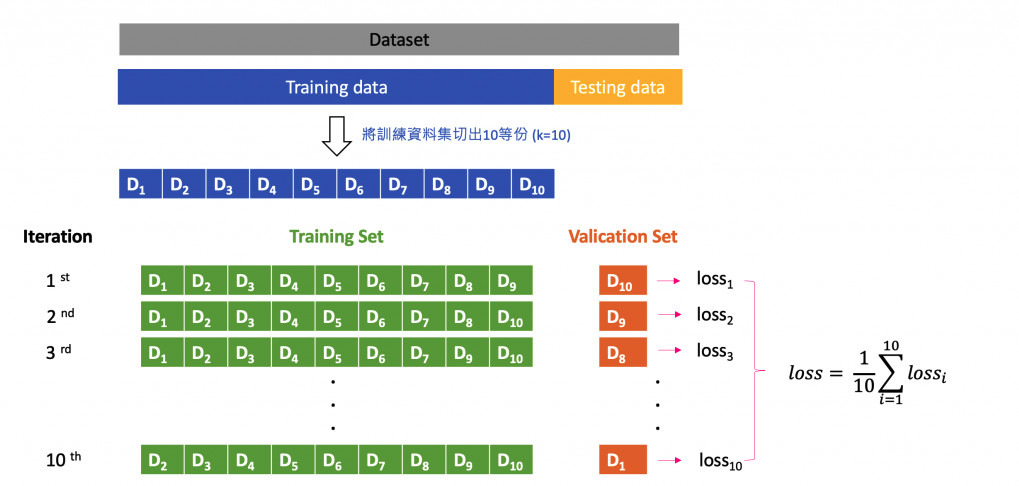

In [69]:
# 匯入必要的庫
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# 載入 iris 資料集
iris = load_iris()

# 將資料集分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

param_grid = {
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.1, 0.5, 1.0],
}

clf = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring="f1_macro")
# 使用交叉驗證來評估模型性能：交叉驗證可以有效地減少模型的偏差和方差，從而得到更準確的性能評估結果。 也就是這個 cv
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test, y_test))



{'learning_rate': 0.1, 'n_estimators': 100}
0.8677248677248678


In [1]:
# knn tunning sample

kf = KFold(n_splits=5,shuffle=True,random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

NameError: name 'KFold' is not defined

[score macro micro](https://blog.csdn.net/qq_27668313/article/details/125570210)
- f1_macro 計算的是所有類別的平均 f1 score。
- f1_micro 計算的是所有樣本的 f1 score。

# 集成學習 (Ensemble Learning)

集成學習是一種機器學習技術，它通過結合多個模型的預測結果來提高整體性能。集成學習的基本思想是，通過組合多個模型的優勢，可以克服單個模型的不足，從而獲得更好的結果。

## 集成學習的常見方法

集成學習的常見方法包括：

* **Bagging**：Bagging 是通過對訓練數據進行重複採樣，然後訓練多個模型來實現的。每個模型都使用不同的訓練數據子集，因此它們可以從不同的角度學習數據。RFT
* **Boosting**：Boosting 是通過對訓練數據進行加權，然後訓練多個模型來實現的。每個模型都根據前一個模型的錯誤進行調整，因此它們可以逐步提高整體準確率。GBT
* **Stacking**：Stacking 是通過將多個模型的預測結果作為輸入，然後訓練一個新的模型來實現的。這個新的模型可以學習不同模型之間的關係，從而獲得更好的結果。

## 集成學習的優點

集成學習具有以下優點：

* **提高準確率**：集成學習可以通過組合多個模型的優勢，從而提高整體準確率。
* **降低過擬合風險**：集成學習可以通過多個模型的相互驗證，從而降低過擬合風險。
* **提高魯棒性**：集成學習可以通過多個模型的相互補充，從而提高魯棒性。

## 集成學習的應用

集成學習在實際應用中取得了廣泛的成功，例如圖像識別、自然語言處理、推薦系統等領域。

以下是一些集成學習的應用示例：

* 在圖像識別領域，集成學習可以用於提高識別準確率。例如，Google 的 Inception V3 模型使用了多個卷積神經網絡 (CNN) 模型，通過集成學習來提高識別準確率。
* 在自然語言處理領域，集成學習可以用於提高機器翻譯的準確性。例如，Google 的 Translate 模型使用了多個機器翻譯模型，通過集成學習來提高翻譯準確性。
* 在推薦系統領域，集成學習可以用於提高推薦的準確性。例如，Netflix 的推薦系統使用了多個推薦算法，通過集成學習來提高推薦準確性。

## Blending

Blending 是集成學習中的一種特殊方法，它通過對多個模型的預測結果進行加權平均來獲得最終的預測結果。Blending 與 Stacking 的主要區別在於，Blending 不需要額外訓練一個模型來融合不同模型的預測結果。

### Blending 的基本流程

Blending 的基本流程如下：

1. 訓練多個模型。
2. 使用每個模型對測試數據進行預測。
3. 對每個模型的預測結果進行加權平均。
4. 將加權平均後的結果作為最終的預測結果。

### Blending 的優點

Blending 的優點包括：

* 簡單，不需要交叉驗證。
* 可以避免過擬合。

### Blending 的缺點

Blending 的缺點包括：

* 可能不如 Stacking 準確。
* 需要人工指定權重。

### Blending 的權重

Blending 的權重可以根據多種因素來確定，例如：

* 每個模型的準確率。
* 每個模型的預測置信度。

在實際應用中，可以使用網格搜索或其他方法來找到最佳的權重。

# stacking 提升算法模型性能

## 摘要

stacking 方法是一種有效的提升算法模型性能的方法。該方法通過將多個基模型的預測結果進行融合，以得到最終的預測結果。

## 原理

stacking 方法的基本原理是：

1. 訓練多個基模型。
2. 使用基模型的預測結果作為特徵，訓練一個融合模型。
3. 使用融合模型來預測新的樣本。

## 優點

stacking 方法具有以下優點：

* 可以提高算法模型的性能。
* 可以提高算法模型的魯棒性。
* 可以提高算法模型的多樣性。

## 缺點

stacking 方法也具有以下缺點：

* 需要訓練多個基模型，計算量較大。
* 需要調優融合模型的超參數，比較複雜。
* 可能會出現過擬合。


## 注意

在使用 stacking 方法時，需要注意以下幾點：

* 基模型的選擇：基模型應該具有良好的性能，並且應該是**多樣的**。
* 超參數調優：需要調優基模型和融合模型的超參數。
* 驗證：需要在驗證集上驗證 stacking 模型的性能。
* 解釋：需要解釋 stacking 模型的結果。


In [52]:
# 匯入必要的庫
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 載入 iris 資料集
iris = load_iris()

# 將資料集分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立 RFT、Adaboost、XGB 和 SVM 模型
rft = RandomForestClassifier(n_estimators=100)
adaboost = AdaBoostClassifier(n_estimators=100)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=2)
svm = SVC()

# 建立 stacking 模型
stacking1 = StackingClassifier(estimators=[('rft', rft), ('svm', svm), ('adaboost', adaboost), ('xgb', xgb)], final_estimator=LogisticRegression())
stacking2 = StackingClassifier(estimators=[('rft', rft), ('adaboost', adaboost), ('xgb', xgb), ('svm', svm)])

# 訓練模型
stacking1.fit(X_train, y_train)
stacking2.fit(X_train, y_train)

# 評估模型
score1 = stacking1.score(X_test, y_test)
score2 = stacking2.score(X_test, y_test)

print("Stacking1 模型的準確率為：", score1)
print("Stacking2 模型的準確率為：", score2)


Stacking1 模型的準確率為： 0.9736842105263158
Stacking2 模型的準確率為： 0.9736842105263158


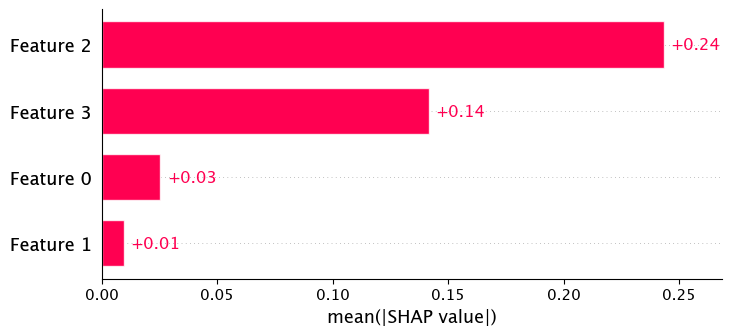

In [41]:
# 匯入必要的庫
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
import shap

# 載入 iris 資料集
iris = load_iris()

# 將資料集分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立 RFT 和 Adaboost 模型
rft = RandomForestClassifier(n_estimators=100)
adaboost = AdaBoostClassifier(n_estimators=100)

# 建立 stacking 模型
stacking = StackingClassifier(estimators=[('rft', rft), ('adaboost', adaboost)], final_estimator=XGBClassifier())

stacking.fit(X_train, y_train)

explainer = shap.explainers.Exact(stacking.predict_proba, X_train)

shap_values = explainer(X_train)
# shap.plots.bar(shap_values)
# shap_values
shap_values = shap_values[..., 1] # 我覺得寫法太特別了 所以斟酌使用
shap.plots.bar(shap_values)

- [shap官方文件](https://shap.readthedocs.io/en/latest/index.html)

## 延伸閱讀
- [機器學習 — 交叉驗證與超參數調整](https://ntudac.medium.com/python-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89%E8%88%87%E8%B6%85%E5%8F%83%E6%95%B8%E8%AA%BF%E6%95%B4-69a752cb6f65)